# Linear Regression


# Introduction

## Linear Regression 

Linear Model is the form of supervised learning, in which we feed the model/algorithm set of attributes called dependent variables and dependent variable which we need to predict. Initially, we provide independent and their corresponding dependent variable to train the model. The basic idea is to obtain best fit line along our datapoints and best fit line is which has minimumm sum of distance between datapoints to our regression line.

Basic equation for linear model can be defined as Euclidean dot product between 2 vectors:$$ f(x; w) = w^T x = \sum_{0}^{D} w_i x_i $$where 'w' is the weight vector and 'x' is the input vector.

**Workbook Introduction**

In this workbook, first we clean and preprocess the data and then perform visualizations using plots and graphs on the data to understand the trends, patterns and  to find the relationships among the features of in the data, before performing the regression. We will be discussing Least Squares and Least Mean Squares in this workbook, learn to implement them to obtain the best fit line, later test them  and then visualize the results we obtained from the regression.

Also, we identify most and least significant features and perform regression without thee features and compare it with the regression performed considering all the featuress.

# Data

## Description 

Data is the snapshot of Melbourne Housing Dataset and is taken from Kaggle.This dataset is created by Tony Pino.It was scraped from publicly available results posted every week from Domain.com.au. Tony Pino cleaned it well, and uploaded it in Kaggle. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

Data Source: Tony Pino, Domain.com.au,"Snapshot of Tony Pino's Melbourne Housing Dataset", https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

**Features of the data:**

Suburb: Suburb in Melbourne

Address: Address of the property

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Postcode: Postcode of housing

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

YearBuilt: Year in which property is built 

CouncilArea: Governing council for the area

Latitude: Latitude of the property

Longitude: Longitude of the property

#### Reading of the data

In [1]:
# Data read-in

import pandas as pd
import numpy as np

data=pd.read_csv("melb_data.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [2]:
# Summary of the data
print(data.shape)

#Structure of the data
data.info()

# Description of the data
data.describe()

#Checking missing values in the data
data.isna().sum()

(13580, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [3]:
#Identifying the numerical variables.

data.select_dtypes(include=[np.number]).columns


Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [4]:
#Identifying categorical values 

data.select_dtypes(exclude=np.number).columns


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

#### Preprocessing data for analysis

In [5]:
#  Handling missing values considering median

data['Car'].fillna(np.nanmedian(data['Car']), inplace=True)
data['YearBuilt'].fillna(np.nanmedian(data['YearBuilt']), inplace=True)
data['BuildingArea'].fillna(np.nanmedian(data['BuildingArea']), inplace=True)
data['CouncilArea'].fillna(data['CouncilArea'].value_counts().index[0], inplace=True)
data.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [6]:
# Calculating skewness

data.skew()


Rooms              0.376478
Price              2.239624
Distance           1.676937
Postcode           4.076152
Bedroom2           0.774082
Bathroom           1.377406
Car                1.366017
Landsize          95.237400
BuildingArea     107.128531
YearBuilt         -2.173996
Lattitude         -0.426695
Longtitude        -0.210991
Propertycount      1.069339
dtype: float64

## Plots for understanding or analysis

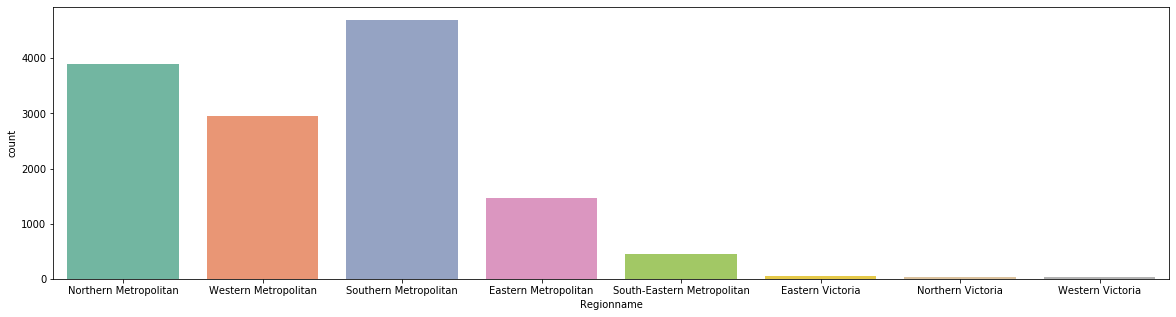

In [7]:
# Count plot for Regionname

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.countplot(x='Regionname',data=data, palette="Set2")


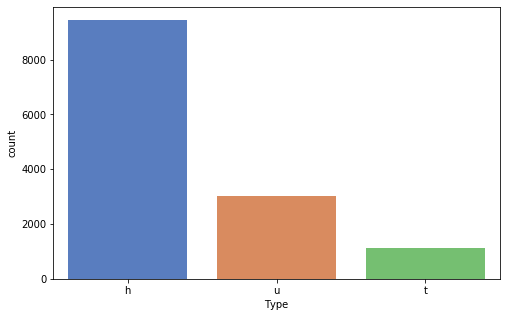

In [8]:
# Count plot for Type of the property

plt.figure(figsize=(8,5))
sns.countplot(x='Type',data=data, palette="muted")


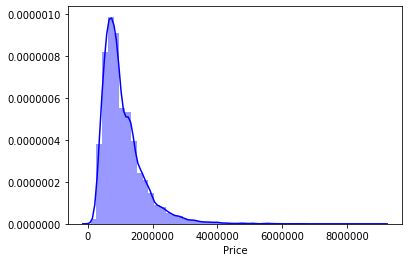

In [9]:
# Dist Plot for price

sns.distplot(data['Price'],color='blue')


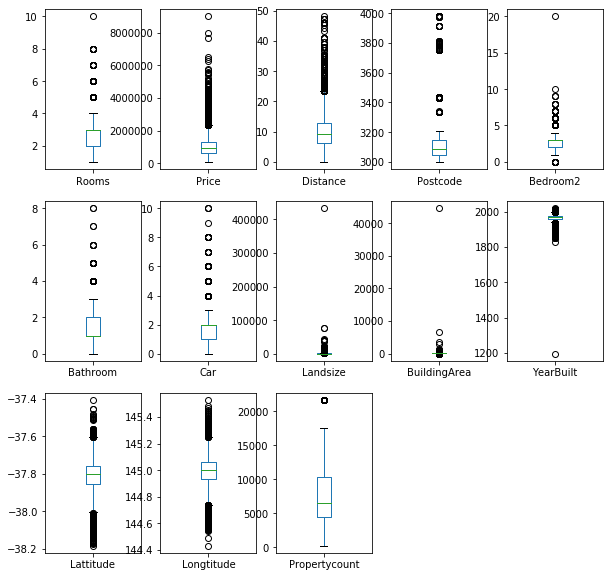

In [10]:
# Finding outliers 

from matplotlib.patches import Polygon

data.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False,figsize=(10,10))
plt.show()


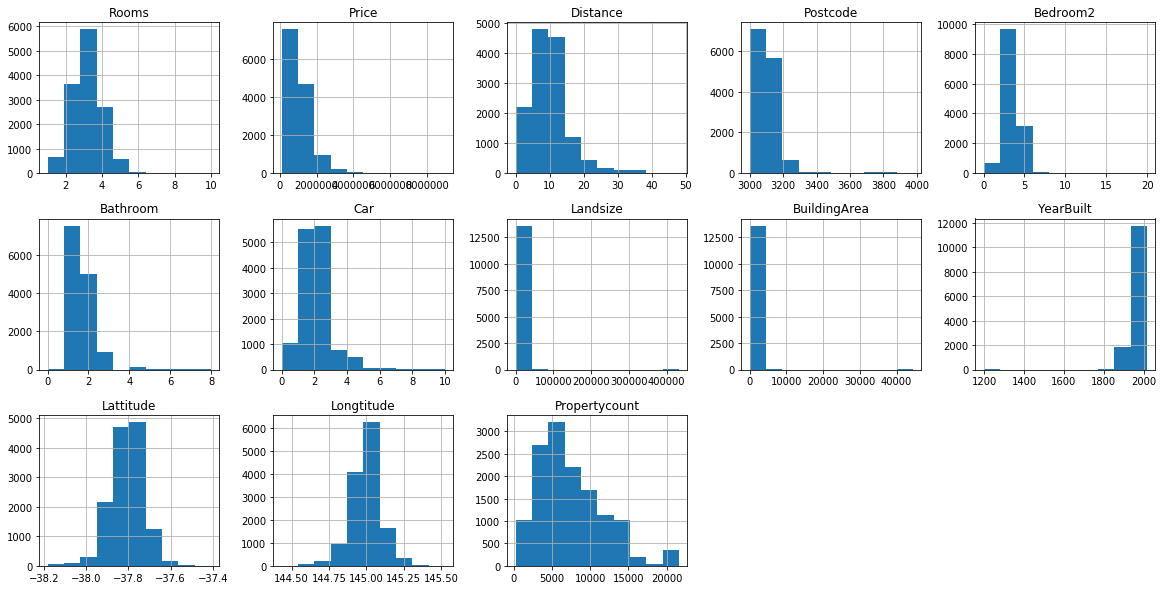

In [11]:
#Plotting a histogram of the data

data.hist(layout=(3,5),figsize=(20,10))

#Showing the histogram using plt.show()

plt.show()

Text(0, 0.5, 'Price')

<Figure size 720x360 with 0 Axes>

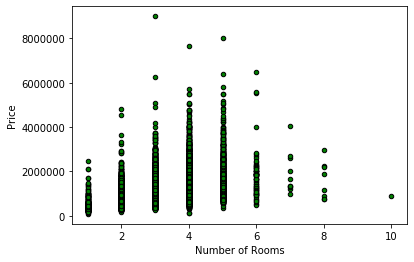

In [12]:
# Scatter plot to find the relationship between rooms and Price of the property 

plt.figure(figsize=(10,5))
data.plot.scatter(x='Rooms',
                      y='Price',
                      c='Green',edgecolors= "black")
plt.xlabel('Number of Rooms')
plt.ylabel('Price')


In [13]:
 #Finding correlation of the data

data.corr()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.406935,0.025678,0.092757,-0.051562,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.239109,0.037507,0.069763,-0.259387,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.260596,0.025004,0.073968,0.194815,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050514,0.024558,0.040357,0.025400,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.403867,0.025646,0.090346,-0.041331,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.321014,0.037130,0.087714,0.113957,-0.070594,0.118971,-0.052201
Car,0.406935,0.239109,0.260596,0.050514,0.403867,0.321014,1.000000,0.026780,0.068272,0.078696,-0.002023,0.062929,-0.024344
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026780,1.000000,0.094015,0.008806,0.009695,0.010833,-0.006854
BuildingArea,0.092757,0.069763,0.073968,0.040357,0.090346,0.087714,0.068272,0.094015,1.000000,0.002359,0.032288,-0.018620,-0.020905
YearBuilt,-0.051562,-0.259387,0.194815,0.025400,-0.041331,0.113957,0.078696,0.008806,0.002359,1.000000,0.046718,-0.000515,0.004421


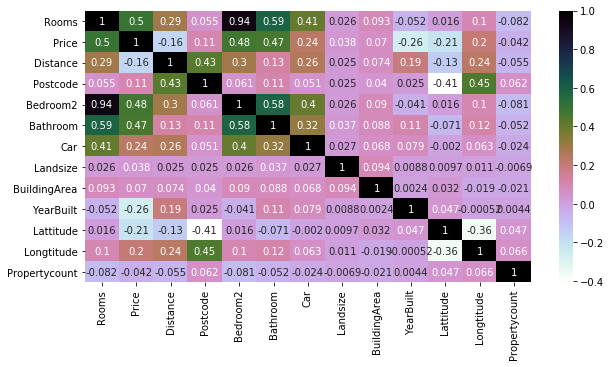

In [14]:
#Showing correlation using Heatmap

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()


## Preliminary Observations

There are 13850 instances and 21 features. As a part of preprocessing, identified that missing values in the data. They are removed by replacing it with median. Landsize and BuildingArea are highly skewed features in the data. YearBuilt , Lattitude, Longitude are negatively skewed variables as their skewness is less than zero. Rest of the features are positively skewed.Most of the properties are in the South Eastern Metropolitan Region.We have almost more than 8000 properties of type 'h' and less than 1500 properties of type 't'.We don't have uniformity in data for Type feature.There are outliers in the data and skewness is also observed in the data using Histogram which shows whether the features are normal distributed or not. The attributes Property count, latitute and longitude are close to normal distribution and others are not normally distributed, negatively or positively skewed. Price of the property is distributed according to the rooms, property with 3 rooms have the highest price.Correlation is done to find the relationship between the features and vizualized it using the heat meap, found that bedrooms2 and rooms have highest correlation of 0.94 which is expected.

## Preprocessing data for regression

#### Finding the correlation with respect to dependent variable

We are trying to predict the price of the property. So finding the correlation of other features with respect to the feature 'Price'

In [15]:
correlation=data.corr()
correlation

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.406935,0.025678,0.092757,-0.051562,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.239109,0.037507,0.069763,-0.259387,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.260596,0.025004,0.073968,0.194815,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050514,0.024558,0.040357,0.025400,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.403867,0.025646,0.090346,-0.041331,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.321014,0.037130,0.087714,0.113957,-0.070594,0.118971,-0.052201
Car,0.406935,0.239109,0.260596,0.050514,0.403867,0.321014,1.000000,0.026780,0.068272,0.078696,-0.002023,0.062929,-0.024344
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026780,1.000000,0.094015,0.008806,0.009695,0.010833,-0.006854
BuildingArea,0.092757,0.069763,0.073968,0.040357,0.090346,0.087714,0.068272,0.094015,1.000000,0.002359,0.032288,-0.018620,-0.020905
YearBuilt,-0.051562,-0.259387,0.194815,0.025400,-0.041331,0.113957,0.078696,0.008806,0.002359,1.000000,0.046718,-0.000515,0.004421


In [16]:
correlation['Price'].sort_values(ascending = False)

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.239109
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.069763
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.259387
Name: Price, dtype: float64

Sorting the correlation in the descending order to find the highly correlated features with respect to the dependent variable 'Price'


#### Checking for any missing values before regression

In [17]:
data.columns[data.isna().any()].tolist()

[]

There are no missing values in the data to be considered for regression. Missing values in the data were addressed as a part of preprocessing before plotting for understanding and analysis. Just checking the same before regression.

#### Creating Independent and dependent variables 

In [18]:
X_data=data[['Rooms','Bedroom2','Bathroom','Car','Longtitude','Postcode','BuildingArea','Landsize','Propertycount','YearBuilt','Distance','Lattitude']].values
X1_data=data.loc[:,['Suburb','Regionname','Type','Method','CouncilArea']]
target=data['Price'].values

X_data contains all the numerical features excluding the dependent variable 'Price', X1_data contains categorical values and target contains only dependent numerical variable 'Price' which is to be predicted using regression.

### Encoding

To convert categorical values to numerical values, we are performing Encoding using LabelEncoder. Dataframe X1_data contains all the categorical values on which LabelEncoding is to be done.



In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in X1_data.columns:
    X1_data[column] = encoder.fit_transform(X1_data[column])

Combining data frame X_data with numerical variables with X1_data (converted numerical variables) using hstack in the below code.

In [20]:
X_data = np.hstack((X_data,X1_data))
print(X_data.shape)

(13580, 17)


#### Feature Scaling 

Feature scaling is important before performing Linear Regression. Machine Learning algorithms do not perform well when data have very different scales. For example, in our dataset landsize ranges from 0 to 433K while prices ranges from 85K to 9000K. So scaling the features to get the better results.

This can be done in various ways:

Min-Max Normalization

Mean Normalization

Standardization

In [21]:
def normalize(X):
    nX = (X- X.mean())/ X.std()
    return nX

In [22]:
nX = normalize(X_data)
nX.shape

(13580, 17)

Now the data nX is normalized and ready to be applied for regression with target variable in dataframe 'target'

# Method

## Review
In the regression problems our target values are real numbers and our goal is to find best fit line for our data. so simple line equation is:$$ f(x;w) = w_1 x + w_0 $$if we have multiple inputs for x:$$ f(x;w) = w_D x_D + .....+ w_1 x_1 + w_0 $$where D, is the number of attributes or feature in our input data.

So main idea behind getting best fit line is to find and minimize the cost/Error function. By minimizing error function we mean, minimize the sum of Euclidean distances between target values and our predicted values.$$ E(w) =  \sum_{i=1}^{N} (f(x_i;w_i) - t_i)^2 $$

For the Least squares we try to minimize the above mentioned error function. Above mentioned equation is quadratic equation, we will get minimum value by taking derivative of that eqaution with respect to the 'w' and put that equal to 0. After solving we will get:$$ w = (X^T X)^{-1} X^T t $$where, X = Input matrix of N * D (N = Number of samples and D = Number of attributes)

t = Matrix of the target value

w = Matrix of the weights corresponding to each attribute
Least Mean Squares: Unlike Least Squares method it does not use all the data available in one go but, it follows the Online Learning process. By this we mean that we calculate the value of weight at each iteration (for each datapoint) and based on calculated values in previous step, it makes new estimation.

It is represented as:$$ w^{k+1} = w^k - \alpha \nabla E_k $$For this equation, We initially guess the value of 'w'

k = represents the steps in repetition

$E_k$ = represents the error rate for k sample.

$\alpha$ = Learning Rate Further, we calculate the gradient i.e. $\nabla E_k$ and finally gets:$$ w^{k+1} = w^k - \alpha ({w^{(k)}}^T - t_k) x_k $$This is final weight vector, LMS will compute for each sample and this process can be repeated for any nnumber of times to get the best weight (which give us best fitting line for our data points).

## Explanation of Codes

Two algorithms are to be implemented as part of implementation i.e Least Squares and Least Mean Squares. A base class BaseModel is implemented which is having only two abstract methods 'train' and 'use', and they are defined further in different classes which are inheritig BaseModel class.

Further, LinearModel class is implemented which is inheriting "BaseModel" having its constructor in which "Weight" is defined as None. And having its own methods _check_matrix - This method checks whether the passed matrix is 2-dimensional or not and add_ones- add column of basis to the passed matrix in its parameter. Apart from its two method, this class has 2 other abstract method of its parent class "BaseModel" but not providing defination for that abstract methods.

**Least Square**

LinearRegress is the class which is implementing the code for Linear Regression through Least Square method. This class is inheriting "LinearModel" class. It has its own constructor which is calling constructor for the parent class and will initialize "self.w" i.e the weight which will be used further in whole code. This class is providing the defination for the abstract methods of its super class (train and use methods).

*Train(self,X,T):*

This method accepts 2 parameters, one is 2-dimentional matrix of predictors and another is Target vector. Basically, this method is calculating the weights which when dot product with our predictor matrix will give best prediction line. This method first add "ones" to the passed 2-D matrix by calling its super class method and then calculated the weights by "np.linalg.inv" method.

*Use(self,X):*

This methods finally return the predicted value vectors calculated with the dot product of 'weights' calculated in train method and 'predictor' matrix.

**Least Mean Squares**

LMS is the class providing code for implemeting best fit line through Least Mean Squares method. Similar to the Least Square class, it is inheriting "LinearModel" class. Similarly its constructor calling its parent class constructor and apart from that its has its own member variable "self.alpha", which means when call this class, we need pass learning rate. And unlike to previos class it has its own method "train_step" besides implementing abstarct methods(train and use methods) of its super class.

*Train(self,X,Y):*

This method is bit different from train method of previous class, it first initializing weight vector with zeros after adding 'ones' to the 2-D matrix that is passed as parameter to this function. Further, it is iterating over the number of samples in 2-D matrix and calling 'train_step' method of its own class, passing particular row as vector and actual value(t) correspondingly.

*Train_step(self,x,t):*

This method is called fromm train method. It first convert actual value 't' to 1*1 matrix. It further checks that if weights are not initialized(if this method is directly called from outside), then initialize weight vector and adding ones after converting vector 'x'(Single Sample) to 2-D matrix that is passed into this function. if weights are initialized (this function is called from train method), then it only reshape 'x' vector(Single Sample) to 2-D matrix passed to this function. And futher evelautes 'Weight' vector corresponding to the particularr sample passed into it and selts in 'self.w'.

*use(self,X):*

This method similar to the previos class 'use' method calculates predicted value vector based on best 'weight vector (self.w)' calculated through train and train_step methods.

## Correct Implementation

Implementation is done using the Super class, least squares, the least mean squares class. This implementation is verified using preliminary test.

### Super Class Definition

In [23]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [24]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = super().add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T
    
    # apply the learned model to data X
    def use(self, X):
        X = super().add_ones(X)
        Y = X @ self.w
        return Y

### Least Mean Squares

In [25]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for k in range(X.shape[0]):
            self.train_step(X[k], T[k])
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.hstack((1,x))
        x = x.reshape(1,x.shape[0])
        if self.w is None:
            self.w = np.zeros((1,x.shape[1]))
           
        y = self.w @ x[0,:]
        grad = self.alpha * (y - t[0])  
        self.w -= grad * x[:]
    
    # apply the current model to data X
    def use(self, X):
        X1 = super().add_ones(X)
        y =  X1 @ self.w.T
        return y
        

### Preliminary Test

In [26]:
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


### Usage Examples

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

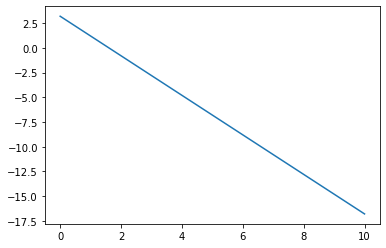

In [28]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()
ls.train(X, T)
plt.plot(ls.use(X))

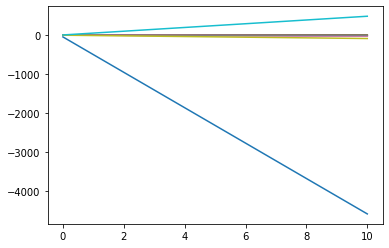

In [29]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

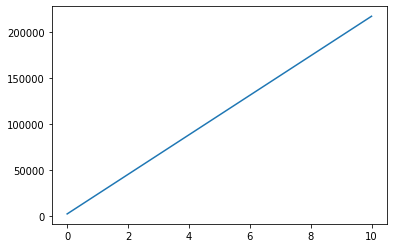

In [30]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

## Description, codes

#### Partitioning the data into Train and Test datasets

The sample of data used to fit the model is called Train data.The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset is called Test data. This partition is done based on data split ratio. This ratio depends on the total number of samples in the data and the actual model we are training.In the below code, this partition is done by partition class.

In [31]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    idxs = np.random.permutation(X.index)

    N = X.shape[0]
    
    X_train = np.zeros(shape=(1,X.shape[1]))
    T_train = np.zeros(shape=(1,T.shape[1]))
    
    X_test = np.zeros(shape=(1,X.shape[1]))
    T_test = np.zeros(shape=(1,T.shape[1]))
    
    j = 0
    for k, r in enumerate(ratio):
        rows = int(round(N * r))  # number of rows
        i = 0
        if k == len(ratio) -1:
            for i in range(rows):
                if(j< N):
                    X_test = np.vstack((X_test,X.iloc[idxs[j]:idxs[j]+1, :]))
                    T_test = np.vstack((T_test, T.iloc[idxs[j]:idxs[j]+1, :]))
                    j+=1
        else:
            for i in range(rows):
                X_train = np.vstack((X_train,X.iloc[idxs[j]:idxs[j]+1, :]))
                T_train = np.vstack((T_train, T.iloc[idxs[j]:idxs[j]+1, :]))
                j+=1

    X_train = np.delete(X_train, (0), axis=0)
    X_test = np.delete(X_test, (0), axis=0)
    T_train = np.delete(T_train, (0), axis=0)
    T_test = np.delete(T_test, (0), axis=0)
    return X_train, T_train, X_test, T_test

In [59]:
X_train, T_train, X_test, T_test = partition(pd.DataFrame(nX), pd.DataFrame(target))

In [60]:
print("Shapes of X_train{},T_train{}, X_test{}, T_test{}".format(X_train.shape, T_train.shape, X_test.shape, T_test.shape))

Shapes of X_train(10864, 17),T_train(10864, 1), X_test(2716, 17), T_test(2716, 1)


The Partition class above is randomly splitting the data into 4 different training and test sets. Out of them 'X_train' and 'T_train' contains 80% of the total data and is used to train the model. And 'X_test and T_test' will be used for testing the data.

This partition class is applied on the Data frame nX obtained by scaling using normalization and the target variable 'Price' store in dataframe 'target'

#### Least squares

Training the data using Least squares algorithm and evaluated using test data. Root Mean Square Error(RMSE)is calculated to get a good estimate of the model.

In [61]:
ls = LinearRegress()
ls.train(X_train, T_train)
y_ls = ls.use(X_test)

In [62]:
np.sqrt(np.mean((T_test - y_ls)**2))

437409.565091652

#### Least Mean Squares

Training the data using Least Mean squares algorithm and evaluated using test data and the Root Mean Square Error(RMSE) is calculated.

In [63]:
lms = LMS(.00004945)
lms.train(X_train, T_train)
y_lms = lms.use(X_test)

In [64]:
print(np.sqrt(np.mean((T_test - y_lms)**2)))

733322.8078916514


Calculated the root-mean-square error(RSME) values for both the algorithms in the above code.

#### Description of the codes

In the above code, we are creating an object of LinearRegress class, which is further used to call its function. First 'train' method is called in which we are passing our training datasets obtained by applying dataframe nX and target to the partition class. This function will calculate the best possible weight according to the data. Secondly, 'use' method is called in which we are passing our test dataset on which it is calculating target values based on the weights calculated in previous method and further these predicted value be comapred with actual test values splitted above.

In this call, we are creating LMS object called lms and using this object we are calling its 'train' method in which we are passing our training datasets. Further, we are calling its 'use' function which is returning predicted values vector, that can be compared further with the test value to check the accuracy

## Visualization of results

The evaluated results using test data are plotted to visualize the actual and predicted values. Below are the plots in which actual values are in green and predicted values are in blue. These plots are drawn for both the algorithms.

### Visualization of Least Square results

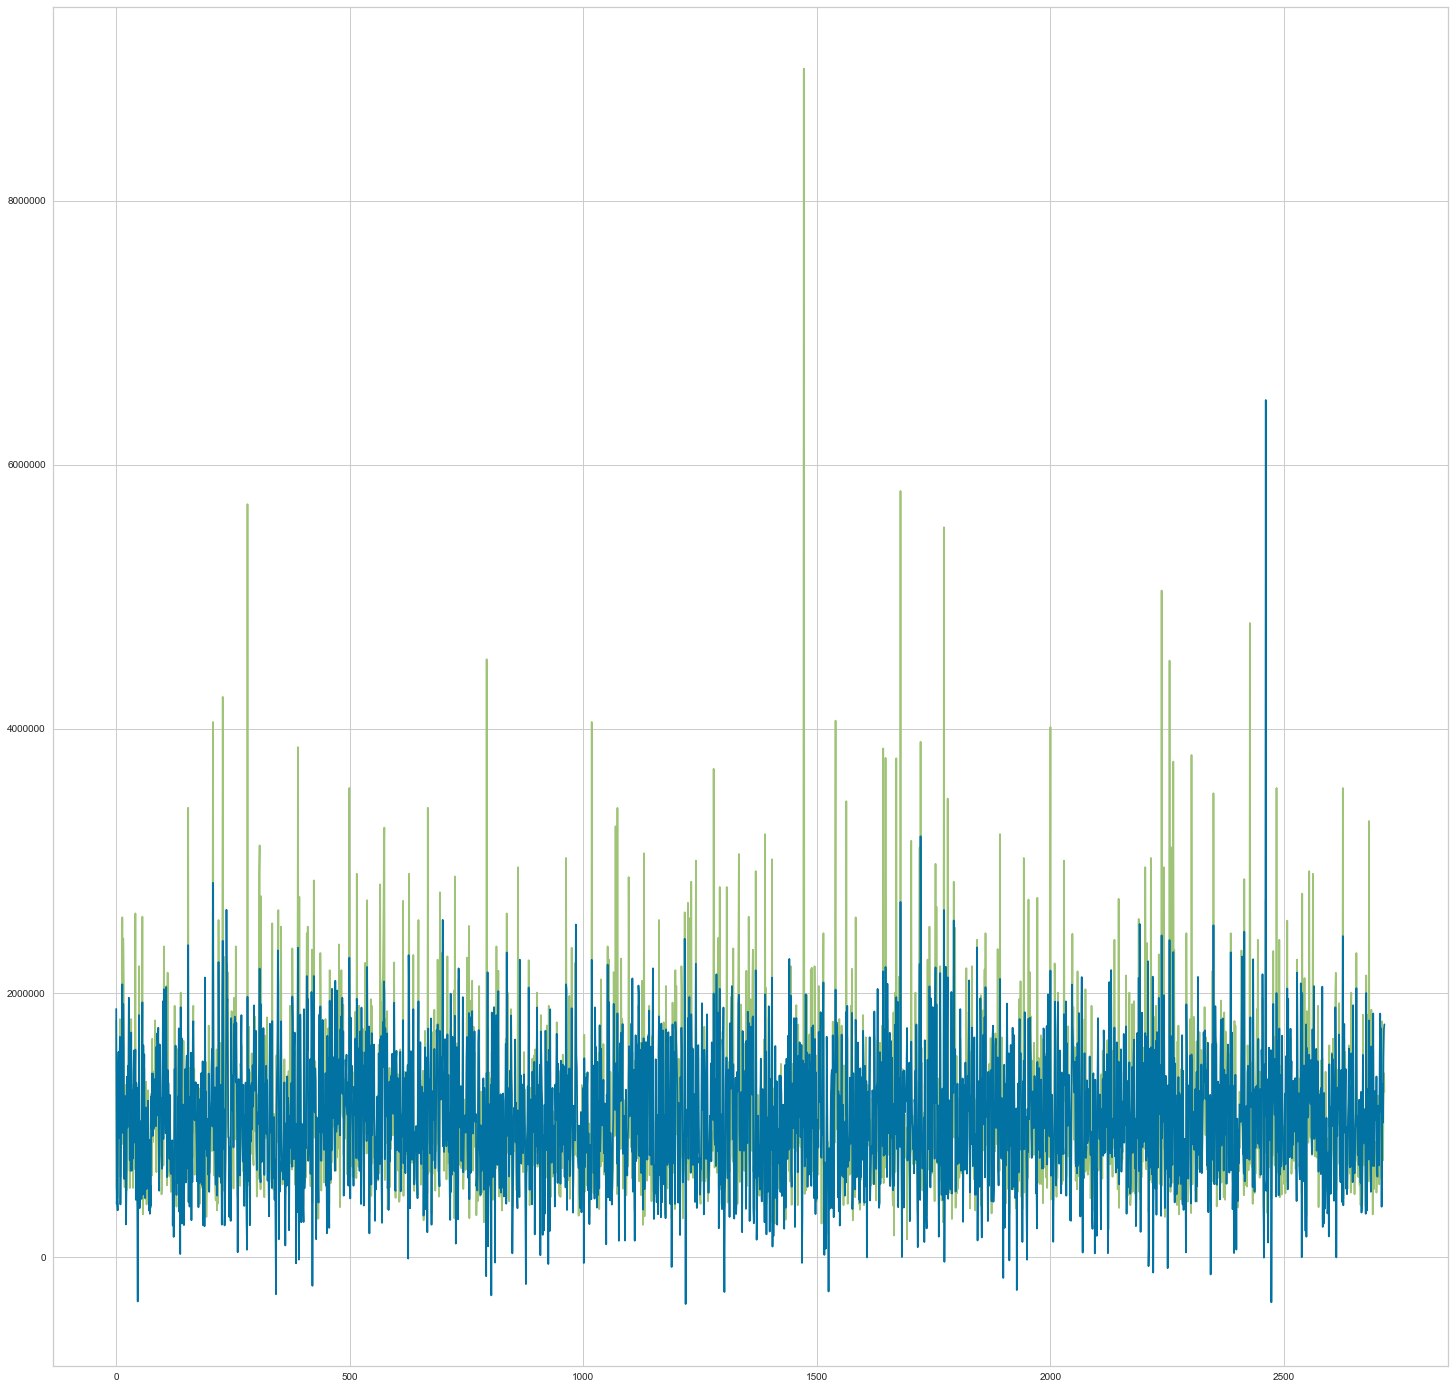

In [65]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'g')
plt.plot(y_ls)

The plot above shows the difference between actual values of our dependent variable(T_test) and the values predicted by the Least Squares model(y_ls). Values in 'Green' color reperesents our T_test values whereas values in blue are predicted values by our model. Difference between the actual and predicted values are evident from the plot. Also there are some extereme points in our graph, may be due of the outliers.

### Visualization of Least Mean Square results

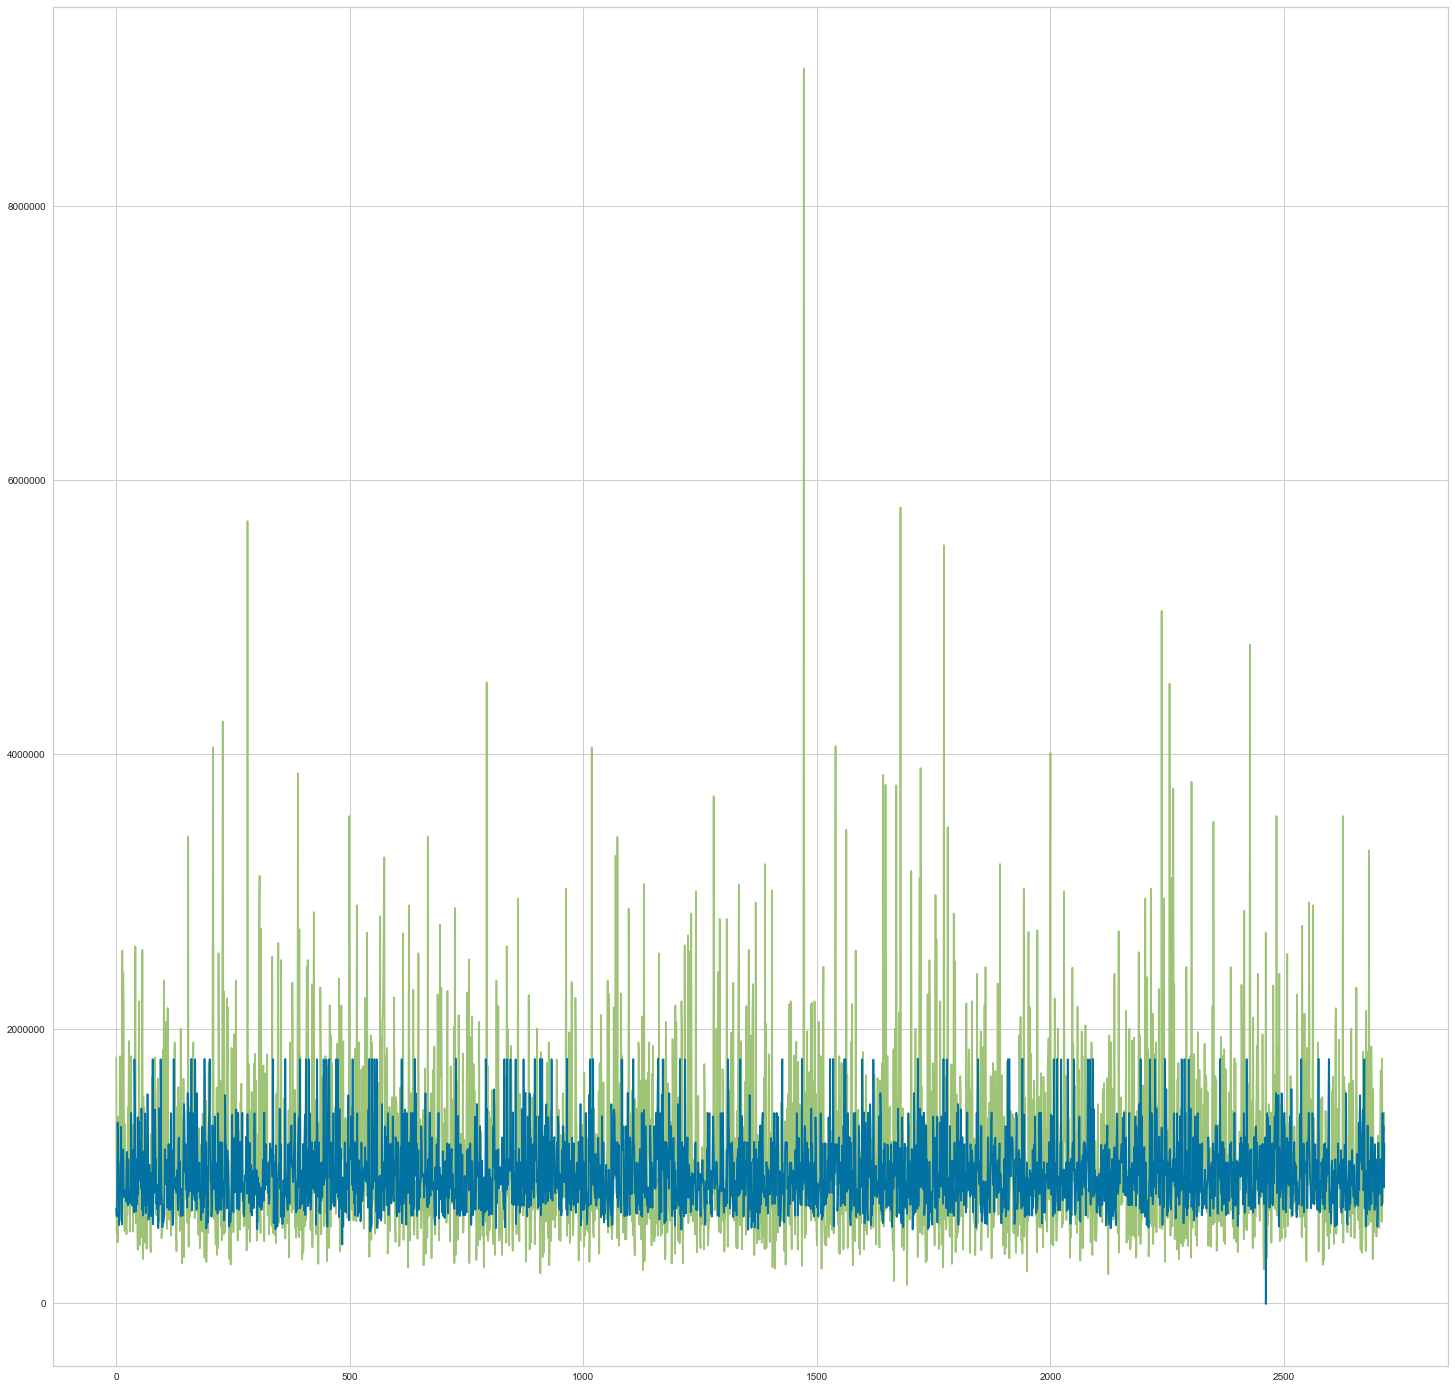

In [66]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'g')
plt.plot(y_lms)

The plot above shows the difference between actual values of our dependent variable(T_test) and the values predicted by the Least Mean Squares (LMS) model (y_lms). Values in 'Green' color reperesents our T_test values whereas values in 'Blue' are predicted values by our model. Difference between the actual and predicted values are evident from the plot. Also there are some extereme points in our graph, may be due of the outliers.

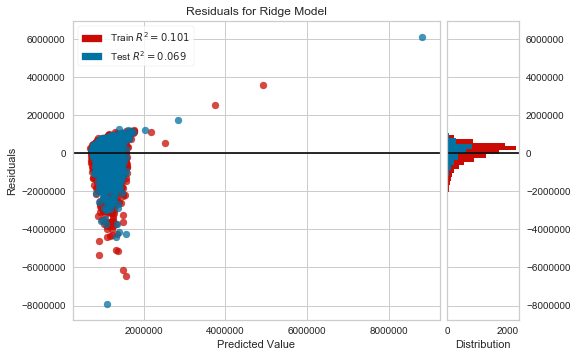

In [67]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge,train_color='r', test_color='b')

visualizer.fit(X_train, T_train)
visualizer.score(X_test, T_test) 
visualizer.poof()

In the residuals plot, bold horizontal line below residuals = 0 indicates the magnitude of error. Since the score is computed as actual - expected, this plot has negative error and is normal. R-squared value of test and train data of this model vary slightly and there is no huge difference. 

## Analysis / comparison of algorithms

When we compare two algorithms, the way they use data available is the primary difference. Least Square algorithm uses all the available data for training while Least Mean Squares algorithm process the data sequentially. In sequential/online learning, data is available in one by one and update the parameters accordingly. Basically, both if the algorithms calculate the weight vectors which when dot product with our feature matrix gives us the predicted values for our model.

With respect to the code, Least Square class(LinearRegress) has 'train' method which is accepting feature matrix and Target vector and based on them, it calculates the weight vector and kept it stored in class variable(self.w). Further, 'use' method calulates the final predicted values by dot product of feature matrix and weight vector(self.w) and finally returned that predicted vector. While Least Mean Squares has some different approach from Least Squares method. In 'train' method, it is just iterating over the number of samples in our dataset and for ech sample it is calling 'train_step'. In 'train_step' method, it is accepting single sample vector and its corresponding value of dependent variable as vector. It estimates weight new vector with the help of previous weight vector and at the end it gives us final weight vector (May or May not be best). 'use' method estimates the final vector of predicted value. Also we have claculate Root Mean Square for the algorithms, just get an rough idea that how good our model is. In my case, the value for RMSE is high, so it might be possible due to our dataset and might be improved by removing the unimportant feature from our datasets.

For the visualization of the algorithms above, we have plot the points between our target test points and target values predicted by our model. In both the algorithm's visualizations, the 'green' points represents the 'T_test' data and blue points represents our 'y_ls'(predicted values). For the Least Squares method we can observe that there is significant difference between the actual and predicted values, which means the accuracy of our model can be improved. Apart from the visualization, we can also conclude this by computing the value of 'Root Mean Square Value' of the model, which is really high. On the other hand, for Least Mean Squares algorithm we can analyze from its plot that it has really a big difference between actual and predicted values. Even after comparing its accuracy with 'Least Squares', it has much more error rate than 'Least Squares' algorithm. And this can also be concluded from 'RMSE' value calculated for this model(733322.81) which is pretty high. I got this value after trying out number of times with different Learning Rate, so 'LMS' is getting best value around .00004945 as learning rate. Below/ Beyond this learning rate the accuracy for LMS declines more.

# Additional Analysis

In this analysis, we are trying to identify most and least significant features in the data and observe the model by removing them. This significance is identified by correlation. Highly correlated features with respect to target or dependent variable are most significant features. Less correlated features with respect to target variable are the least significant features. We start by finding the correlation with respect to depend variable 'Price'.

In [41]:
correlation['Price'].sort_values(ascending = False)

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.239109
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.069763
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.259387
Name: Price, dtype: float64

## Regression by removing most significant features

Considering the correlation of dependent variable 'Price' with other numerical variables, all the numerical values that have correlation values from below and equal to -0.5, above and equal to +0.5 are highly correlated and significant. The features which have correlation close to +0.5 and -0.5 are Rooms, Bedroom2 and Bathroom. Without these highly correlated features, we are going to perform regression. The remaining features considered for analysis are 
'Car','Longtitude','Postcode','BuildingArea','Landsize','Propertycount','YearBuilt','Distance'and'Lattitude'

In [42]:
X2=data[['Car','Longtitude','Postcode','BuildingArea','Landsize','Propertycount','YearBuilt','Distance','Lattitude']]
T2= data [['Price']]
print("Shapes of X2{} T2{}".format(X2.shape, T2.shape))

Shapes of X2(13580, 9) T2(13580, 1)


### Splitting the train and test datasets

In [43]:
X_train, T_train, X_test, T_test = partition(pd.DataFrame(X2), pd.DataFrame(T2))

## Experiments

Now experimenting the regression with train and test data obtained by removing the most significant features.

### Least Square

In [44]:
ls1 = LinearRegress()
ls1.train(X_train, T_train)
y_ls1 = ls1.use(X_test)
np.sqrt(np.mean((T_test - y_ls1)**2))

541227.125657284

### Least Mean Squares

In [45]:
lms1 = LMS(0.000000000022)
lms1.train(X_train, T_train)
y_lms1 = lms1.use(X_test)
np.sqrt(np.mean((T_test - y_lms1)**2))

689644.4005685062

## Visualization

Now, we create plots for the results obtained by regression. Using the same plots used for all the features so that they can be compared.

### Least Squares

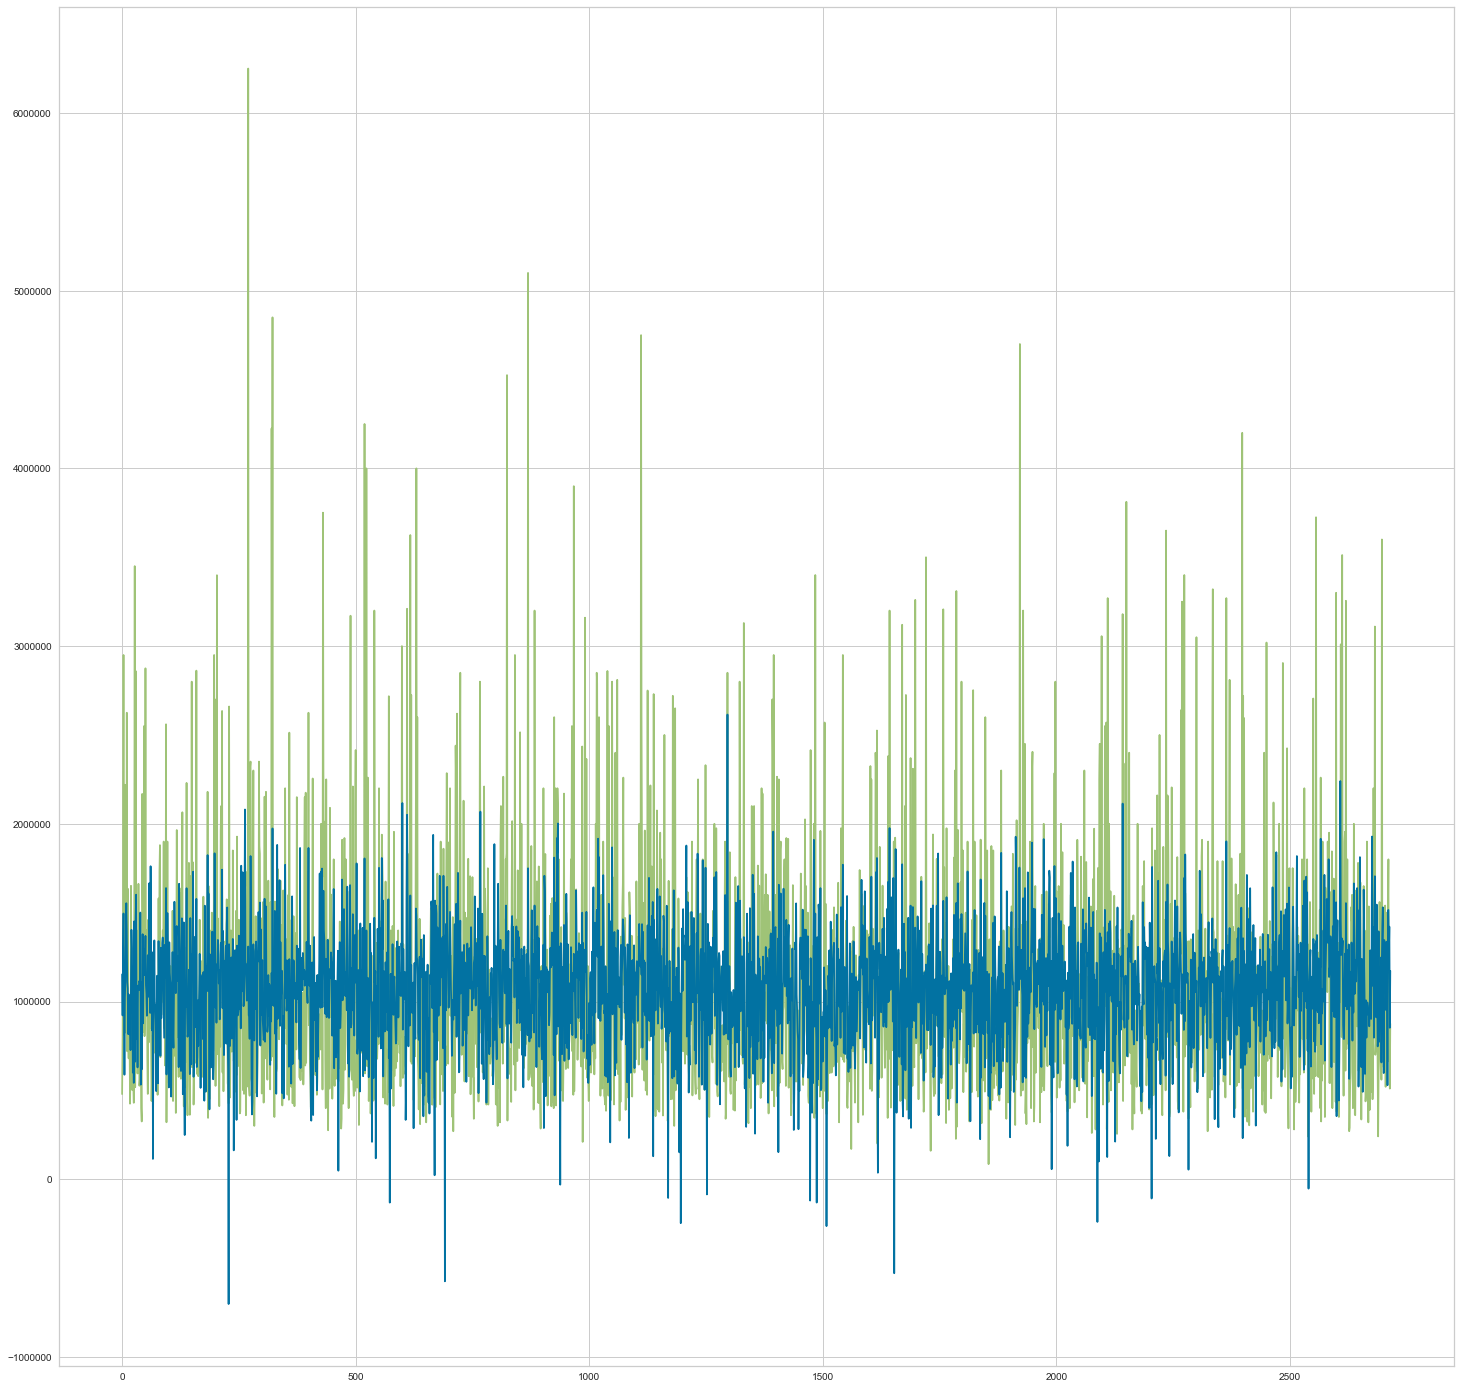

In [46]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'g')
plt.plot(y_ls1)

RSME value increased from 437409.56 to 541227.13 when the most significant features are removed for regression and other features are considered for regression.Removing highly correlated values did not increase the algorithm's performance. The plot shown above visually proves that the difference between actual and predicted values is greater if the highly correlated features are considered than that of the difference between actual and predicted values when all the features were considered and for some value its too large than the actual ones.

### Least Mean Squares

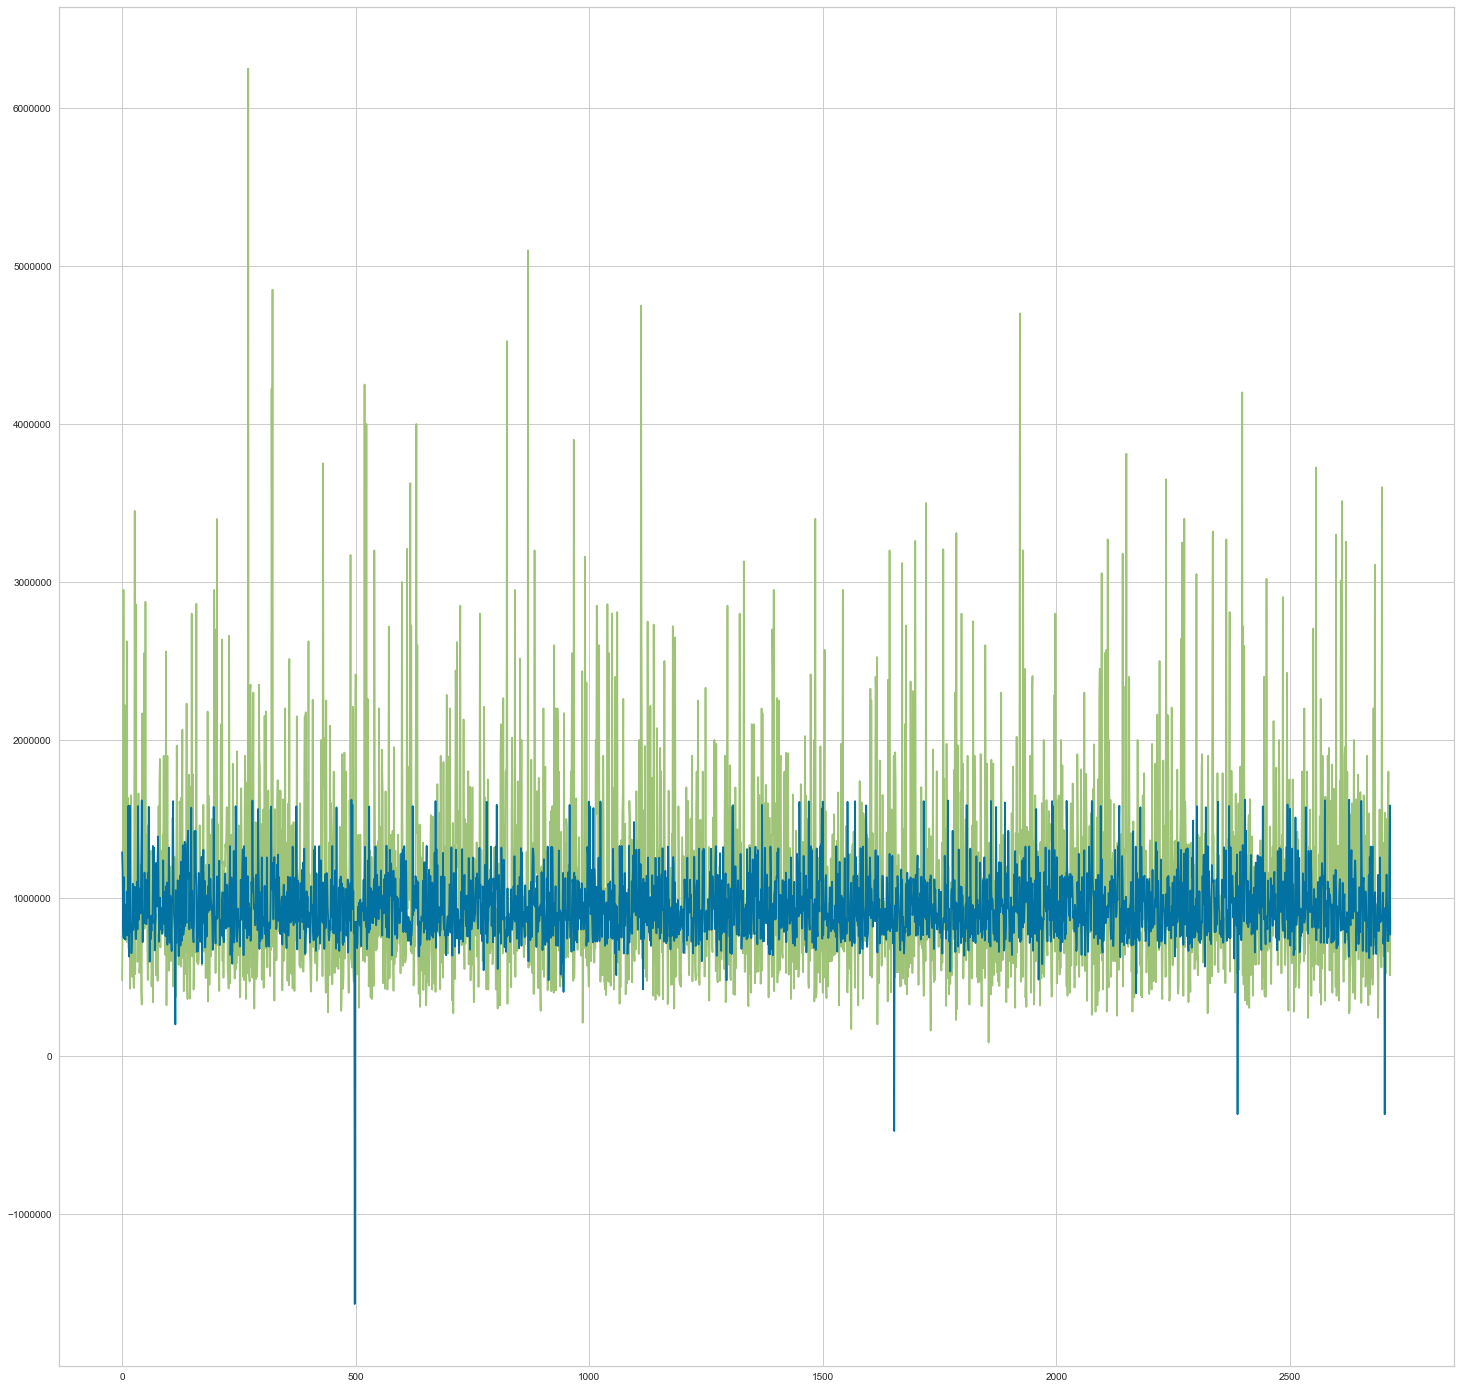

In [47]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'g')
plt.plot(y_lms1)

The same alpha value created infinite values in y . When tried with different alpha values, the reverse happens in the case of LMS with alpha=0.00000000022, RSME value decreased from 733322.80 to 689644.4.The plot proves that there are many data values with less difference between predicted and actual values and when compared this plot and by considering all features, the differences are less in this plot. There are values with huge differences, these may be due to the outliers.

With the same value of alpha as 0.00004945, LMS produces infinite values.

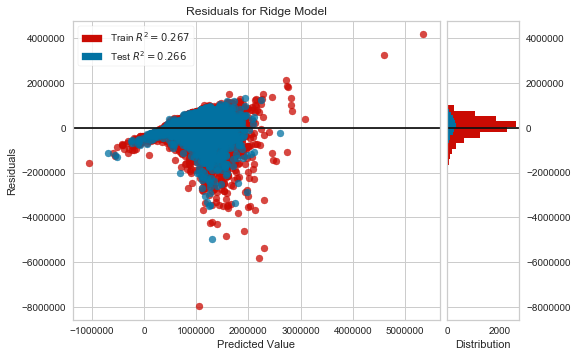

In [48]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge,train_color='r', test_color='b')

visualizer.fit(X_train, T_train)
visualizer.score(X_test, T_test) 
visualizer.poof()

In the residuals plot, bold horizontal line below residuals = 0 indicates the magnitude of error. In the above plot created by removing high signficant values, the error is very minimum. Since the score is computed as actual - expected, this plot has error which is less negative and is normal. R-squared value of test and train data of this model is almost same and there is very minute difference.

## Regression by removing least significant features

Considering the correlation of dependent variable 'Price' with other numerical variables, all the numerical values have correlation values from -0.5 to +0.5 are have less correlation and least significant. The features which have correlation in the range -0.5 and +0.5 are 'Car','Longtitude','Postcode''BuildingArea','Landsize','Propertycount','Distance','Lattitude'and 'YearBuilt'. 

Without these less correlated features, we are going to perform regression. The remaining features considered for analysis are Rooms, Bedroom2, Bathroom

In [49]:
X3=pd.concat([data.iloc[:,2:3],data.iloc[:,10:12]],axis=1).values
T3 = data.iloc[:,4:5].values
print("Shapes of X3{} T3{}".format(X3.shape, T3.shape))

Shapes of X3(13580, 3) T3(13580, 1)


### Splitting the train and test datasets

In [71]:
X_train, T_train, X_test, T_test = partition(pd.DataFrame(X3), pd.DataFrame(T3))

## Experiments

Now experimenting the regression with train and test data obtained by removing the least significant features.

### Least Square

In [51]:
ls1 = LinearRegress()
ls1.train(X_train, T_train)
y_ls1 = ls1.use(X_test)
np.sqrt(np.mean((T_test - y_ls1)**2))

542206.8569891653

### Least Mean Squares

In [52]:
lms1 = LMS(.00004945)
lms1.train(X_train, T_train)
y_lms1 = lms1.use(X_test)
np.sqrt(np.mean((T_test - y_lms1)**2))

549500.6650165116

## Visualization

Now, we create plots for the results obtained by regression by removing features that are least significant. Using the same plots used for all the features so that they can be compared.

### Least squares

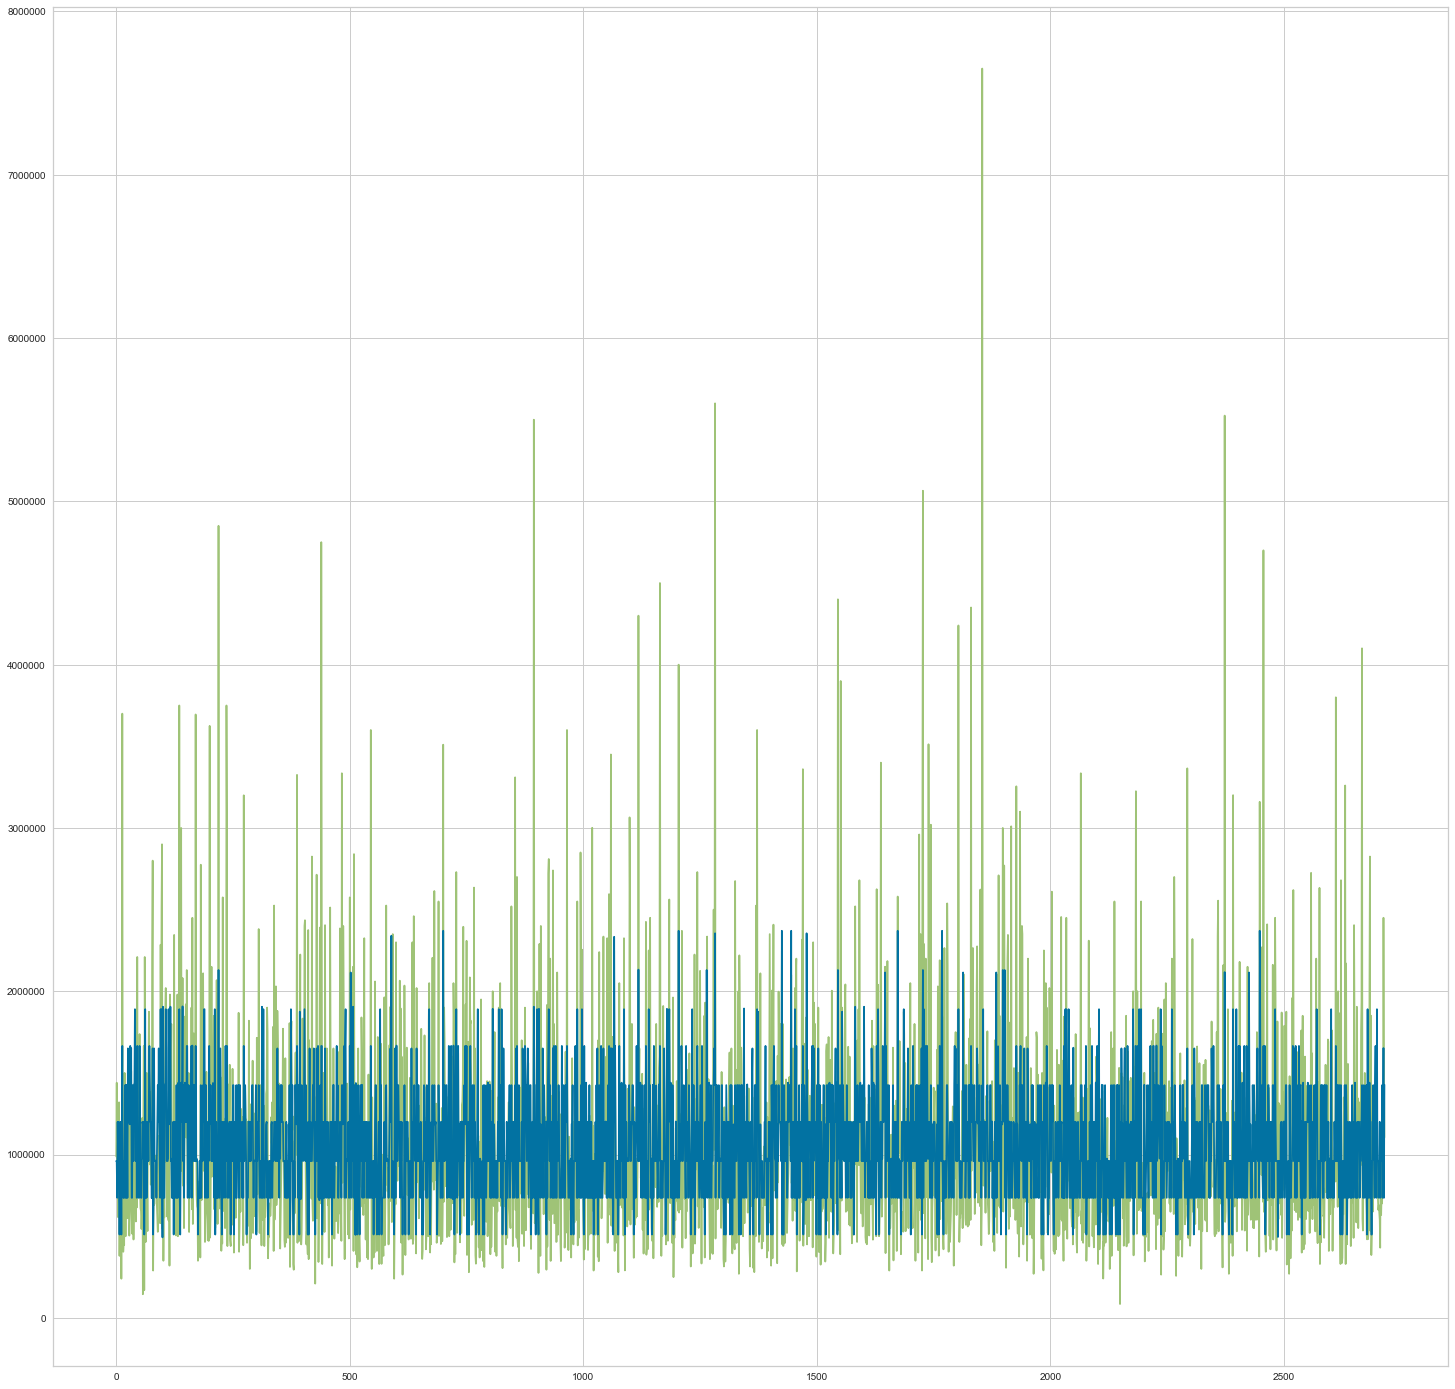

In [54]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'g')
plt.plot(y_ls1)

RSME value increased from 437409.56 to 542206.86 when the least significant features are removed and other features are considered for regression. This did not increase the algorithm's performance. The plot shown above visually proves that the difference between actual and predicted values is greater if the highly correlated features are considered than that of the difference between actual and predicted values when all the features were considered and for some value its too large than the actual ones.Few values have huge difference, this may be due to the outliers.

### Least mean Squares

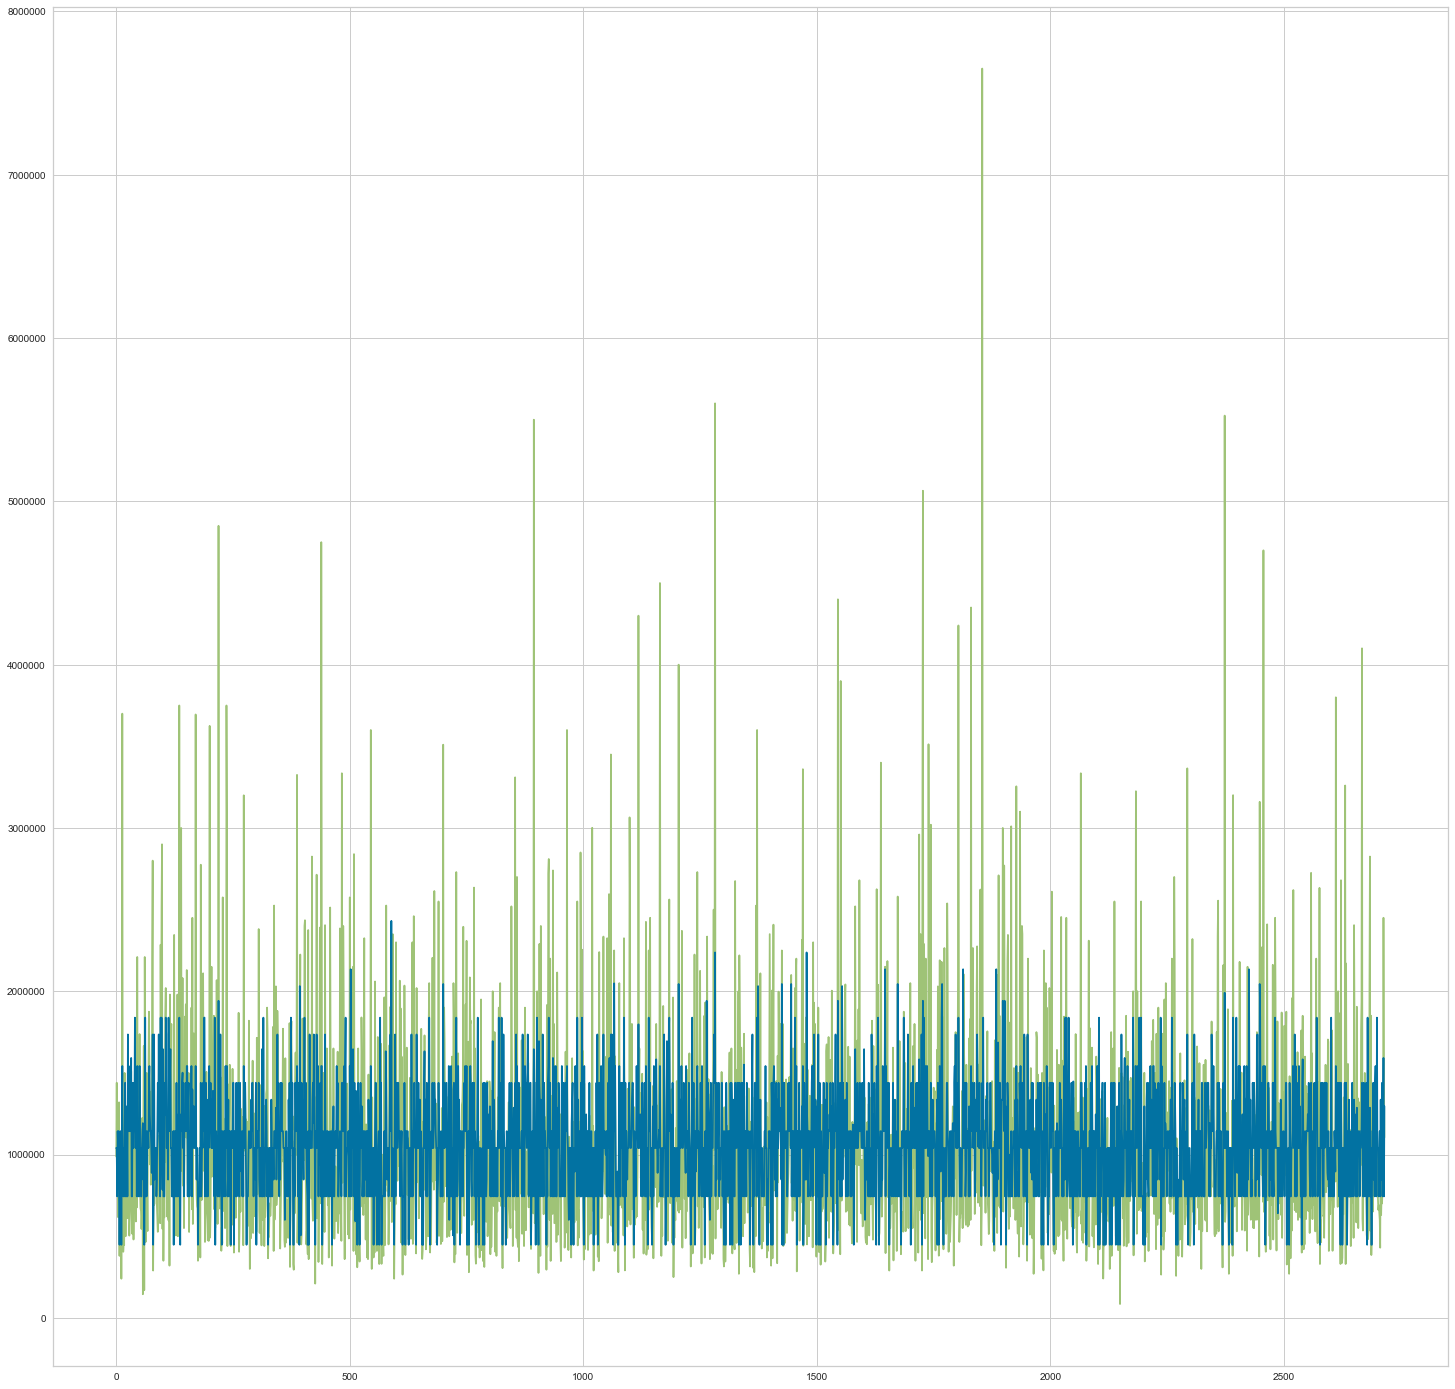

In [55]:
plt.figure(figsize=(25,25))
plt.plot(T_test,'g')
plt.plot(y_lms1)

The reverse happens in the case of LMS. RSME value decreased from 733322.80 to 549500.66. The plot proves that there are many data with less difference between predicted and actual values and when compared this plot with same alpha value and by considering all features, the differences are less in this plot. There are few values with huge differences, these may be due to the outliers.

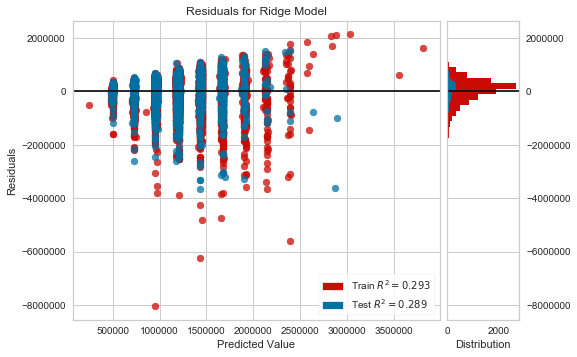

In [72]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge,train_color='r', test_color='b')

visualizer.fit(X_train, T_train)
visualizer.score(X_test, T_test) 
visualizer.poof()

In the residuals plot, bold horizontal line below residuals = 0 indicates the magnitude of error. In the above plot created by removing less signficant values, the error is very minimum. Since the score is computed as actual - expected, the error of this plot is less negative and is normal. R-squared value of test and train data of this model is almost same and there is very minute difference.

# Conclusions

In this workbook, in addition to the visualization of data and preprocessing the data , I have learnt about Linear Model of the Supervised Learning and how the Linear Model works to obtain best fitting line for our dataset. We have discussed and implemented two important algorithms Least Squares and Least Mean Squares to obtain best fit line for our model. Apart from just implementing the algorithms, I came to know the methods of preprocessing the data, to handle the categorical data using LabelEncoder and feature scaling the data using normalization so that all our features are on same scale to get good prediction model.

Both the algorithms depend on Error function, calculated by taking the Euclidean distance between predicted and actual value. Both algorithms calculates the best possible weights which when dot product with feature matrix gives us the predicted values. But the approach followed is different. Least Square takes and process the data in one go while LMS process the data sequentially, which is called Online Learing. LMS just iterates over number of samples and calculates the weight vector each time and at the end it calculates the predicted value on the best weights we get through the process.

We first read the data and try to visualize it without applying any algorithm. Then, preprocess the data which involves- checks the correlation between the attributes, handling the missing value, encode the categorical data and further normalize the data to scale all the attributes to get better prediction value. We then split our datasets into training and test sets. We input the algorithms with training sets and further analyze its prediction on test values with actual values. For the accuracy of the model, we calculated Root Mean Sqaure values (Lesser the value, better our model). Finally, we plot the predicted value with actual value and observed the differences between our actual and predicted values.

We applied the algorithms on the complete dataset, then further tried to improve the models by removing most and least significant columns from The dataset. We observed the deviation from the initial models obtained on the complete dataset but less magnitude of error is observed in the residual plots. Least squares error increased RSME in both the scenarios. There was reduced RMSE values which makes the model better with Least Mean Squares algorithm. But we observed some values which have huge differences in our model in case of Least Squares algorithm by removing most significant features but improved in terms of RSME.

In order to obtain the best model, we have to take care of every step like preprocess the data completely, understand the importance of each attribute with our target attribute. Filter out the data which can affect our data and keep the necessary attributes.

# References

Tony Pino, Domain.com.au,"Snapshot of Tony Pino's Melbourne Housing Dataset",  https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

Bengfort, B., Bilbro, R., Danielsen, N., Gray, L., & others. (2018). Yellowbrick. doi:10.
5281/zenodo.1206239, https://www.scikit-yb.org/en/latest/about.html

Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011), Scikit-learn: Machine learning in Python, Journal of Machine Learning Research, 12(Oct), 2825–2830.

Aurélien Géron, "Hands on Machine learning with scikit learn and Tensorflow", O'Reilly Media, 2017